In [ ]:
#installs
!pip install livelossplot --quiet


In [ ]:
%reset #clear the ipython workspace variables

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #clear, please run `%reset?` for details
Don't know how to reset  the, please run `%reset?` for details
Don't know how to reset  ipython, please run `%reset?` for details
Don't know how to reset  workspace, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details


In [ ]:
%tensorflow_version 2.x

In [ ]:
from pandas import Series
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import glob
from keras.layers import Dropout
from sklearn.utils import shuffle
import sys
from pandas import DataFrame
import math
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.python.client import device_lib
import os
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
import joblib
from livelossplot import PlotLossesKeras


In [ ]:
#data is on google drive so need to load
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#this line needs to be changed depending on file structure of google drive
#os.chdir('/content/drive/MyDrive/WVU_GradStudents_ShareFolder/Jacob_Research/New LSTM Crack')
os.chdir('/content/drive/MyDrive/New LSTM Crack')

In [ ]:
#this function computes how to offset the initial crackheight. should be set to zero.
def auto_crackoffset(crack_pd):
  crack_avg = 0
  crack_offset = 0
  num_avg = 100
  crack_series = np.asarray(crack_pd['Crack Length'])
  #for i in range(0,num_avg):
  #  crack_avg += crack_series[i]
  crack_offset = np.max(crack_series[0:100])
  return -crack_offset

In [ ]:
#Read in the data. Two options read_all=0 - read in all data in folder. read_all=1 - select files, manual
read_all = 1
#Offset Crack to Zero by reading first 100 crack entries and offsetting to zero
offset_crack = 1 # 0=no 1=yes
#
if read_all == 0:
  #read in the training data file names from folder. Everything with extension *.csv
  # Time (s) | Crack Length (m) | Force (N) | Temp (K)
  train_files = glob.glob('./Training/HeatTreated/*.csv')
  print('Files in use: {}'.format(len(train_files)))
  train_files.sort()
  print(train_files)
  train_df = pd.concat([pd.read_csv(f) for f in train_files]) #read files into pandas frame and concat all data together
  #train_df = pd.concat([pd.read_csv(f)[:100000] for f in train_files])
  #ok but does it make sense to concatenate the data together??? does order matter?
  #the last dataset looks a little too noisy.
else: #
  T1 = './Training/HeatTreated/t35_4-3-21_R05_1600N_training.csv'
  T1_timeoffset = 0;T1_crackoffset = 0.0
  T2 = './Training/HeatTreated/t150_4-15-21_R05_1600N_training.csv'
  T2_timeoffset = 0;T2_crackoffset = -0.4
  T3 = './Training/HeatTreated/t250_4-8-21_R05_1600N_training.csv'
  T3_timeoffset = 0;T3_crackoffset = 0.0
  T4 = './Training/HeatTreated/t35_4-2-21_R05_1700N_training.csv'
  T4_timeoffset = 0;T4_crackoffset = 0.0
  T5 = './Training/HeatTreated/t150_4-13-21_R05_1700N_training.csv'
  T5_timeoffset = 0;T5_crackoffset = 0.0
  T6 = './Training/HeatTreated/t250_4-7-21_R05_1700N_training.csv'
  T6_timeoffset = 0;T6_crackoffset = 0.0
  T7 = './Training/HeatTreated/t35_4-19-21_R05_1800N_training.csv'
  T7_timeoffset = 0;T7_crackoffset = -0.6
  T8 = './Training/HeatTreated/t150_4-12-21_R05_1800N_training.csv'
  T8_timeoffset = 0;T8_crackoffset = 0.0
  T9 = './Training/HeatTreated/t250_4-21-21_R05_1800N_training.csv'
  T9_timeoffset = 0;T9_crackoffset = -0.4
  #convert pandas to numpy array
  T1_df = pd.read_csv(T1)
  T2_df = pd.read_csv(T2)
  T3_df = pd.read_csv(T3)
  T4_df = pd.read_csv(T4)
  T5_df = pd.read_csv(T5)
  T6_df = pd.read_csv(T6)
  T7_df = pd.read_csv(T7)
  T8_df = pd.read_csv(T8)
  T9_df = pd.read_csv(T9)

  #determine offset
  if offset_crack>0:
    T1_crackoffset = auto_crackoffset(T1_df)
    T2_crackoffset = auto_crackoffset(T2_df)
    T3_crackoffset = auto_crackoffset(T3_df)
    T4_crackoffset = auto_crackoffset(T4_df)
    T5_crackoffset = auto_crackoffset(T5_df)
    T6_crackoffset = auto_crackoffset(T6_df)
    T7_crackoffset = auto_crackoffset(T7_df)
    T8_crackoffset = auto_crackoffset(T8_df)
    T9_crackoffset = auto_crackoffset(T9_df)
    print('T1 Offset =', T1_crackoffset)
    print('T2 Offset =', T2_crackoffset)
    print('T3 Offset =', T3_crackoffset)
    print('T4 Offset =', T4_crackoffset)
    print('T5 Offset =', T5_crackoffset)
    print('T6 Offset =', T6_crackoffset)
    print('T7 Offset =', T7_crackoffset)
    print('T8 Offset =', T8_crackoffset)
    print('T9 Offset =', T9_crackoffset)
  else:
    T1_crackoffset = 0;T2_crackoffset = 0;T3_crackoffset = 0
    T4_crackoffset = 0;T5_crackoffset = 0;T6_crackoffset = 0
    T7_crackoffset = 0;T8_crackoffset = 0;T9_crackoffset = 0

  #modify data with appropriate time and crack offsets
  T1_df['Time']=T1_df['Time']+T1_timeoffset;T1_df['Crack Length']=T1_df['Crack Length']+T1_crackoffset
  T2_df['Time']=T2_df['Time']+T2_timeoffset;T2_df['Crack Length']=T2_df['Crack Length']+T2_crackoffset
  T3_df['Time']=T3_df['Time']+T3_timeoffset;T3_df['Crack Length']=T3_df['Crack Length']+T3_crackoffset
  T4_df['Time']=T4_df['Time']+T4_timeoffset;T4_df['Crack Length']=T4_df['Crack Length']+T4_crackoffset
  T5_df['Time']=T5_df['Time']+T5_timeoffset;T5_df['Crack Length']=T5_df['Crack Length']+T5_crackoffset
  T6_df['Time']=T6_df['Time']+T6_timeoffset;T6_df['Crack Length']=T6_df['Crack Length']+T6_crackoffset
  T7_df['Time']=T7_df['Time']+T7_timeoffset;T7_df['Crack Length']=T7_df['Crack Length']+T7_crackoffset
  T8_df['Time']=T8_df['Time']+T8_timeoffset;T8_df['Crack Length']=T8_df['Crack Length']+T8_crackoffset
  T9_df['Time']=T9_df['Time']+T9_timeoffset;T9_df['Crack Length']=T9_df['Crack Length']+T9_crackoffset

  #concat all panda arrays together
  train_df = pd.concat([T2_df,T3_df,T4_df,T5_df,T6_df,T7_df,T8_df,T9_df])

T1 Offset = -0.11362863917899448
T2 Offset = -0.2753463291781788
T3 Offset = -0.20643925446136172
T4 Offset = -0.10605084937777676
T5 Offset = -0.1271016272812133
T6 Offset = -0.16595415759320709
T7 Offset = -0.3928301327069228
T8 Offset = -0.10813782418346207
T9 Offset = -0.3331397785222272


In [ ]:
#this function sets any cracklength that is negative to zero. should be necessary if autocrack length function is enabled above.
def check_ncrack(crack_series):
  crack_new = []
  zero = 0
  crack = 0
  for i in range(0,len(crack_series)):
    if crack_series[i]<0:
      crack=zero
    else:
      crack=crack_series[i,0]

    crack_new.append(crack)
  return np.array(crack_new)

float64
float64
float64
crack_series (1712149, 1)
force_series (1712149, 1)
temp_series (1712149, 1)


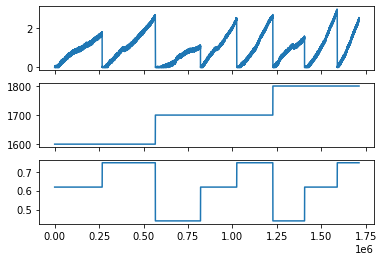

In [ ]:
# crack length
crack_series = train_df.iloc[:,1].to_numpy().reshape((len(train_df),1))
# force
force_series = train_df.iloc[:,2].to_numpy().reshape((len(train_df),1))
# normalize the temperature series data by 553K
temp_series = train_df.iloc[:,3].to_numpy().reshape((len(train_df),1))/700
print(crack_series.dtype)

#check to see if there is any negative crack lengths. If so zero them
crack_series = check_ncrack(crack_series)
print(crack_series.dtype)

crack_series = crack_series.reshape((len(crack_series),1))
print(crack_series.dtype)

print("crack_series",crack_series.shape)
print("force_series",force_series.shape)
print("temp_series",temp_series.shape)

#let's plot the data to see what is going on
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
ax1.plot(crack_series[:,], '-', label='Time') # 
ax2.plot(force_series[:,], '-', label='Force')
ax3.plot(temp_series[:,], '-', label='Temperature')
plt.show()

#so it looks like it is concatenated 1800,1700,1600(med temperature) then 1800,1700,1600(high temperature) then 1800,1700,1600 (room temperature)
#don't quite understand the order or reasoning. but let's see if it works.

In [ ]:
def calc_stress_intensity(force_series,crack_series):
  #Calculate the stress intensity
  #the geometry of the specimen had to be updated on 5/19/21
  stress_intensity = []
  specimen_width = 34.63 #meters #40.8 mm new width 34.63mm
  thickness = 0.4572 #meters thickness of sample 0.4572mm
  a0 = 10 #initial crack length is 10mm
  crossSectArea = specimen_width*thickness #mm to get MPa

  #looks like you are using the polynomial method derived from FEA to determine stress intensity
  for i in range(len(crack_series)):
    if crack_series[i]>0:
      #this first stress intensity is for the initial crack only
      term1 = (force_series[i] / crossSectArea) * sqrt(3.14159 * (a0))
      term2 = 1.122
      term3 = -0.231 * ((a0)  / specimen_width)
      term4 = 10.55 * (((a0) / specimen_width)**2)
      term5 = -21.71 * (((a0) / specimen_width)**3)
      term6 = 30.382 * (((a0) / specimen_width)**4)
      intensity0 = term1*(term2 + term3 + term4 + term5 + term6) #initial crack really only need to calculate for each load but wtf

      term1 = (force_series[i] / crossSectArea) * sqrt(3.14159 * (crack_series[i]+a0))
      term2 = 1.122
      term3 = -0.231 * ((crack_series[i]+a0)  / specimen_width)
      term4 = 10.55 * (((crack_series[i]+a0) / specimen_width)**2)
      term5 = -21.71 * (((crack_series[i]+a0) / specimen_width)**3)
      term6 = 30.382 * (((crack_series[i]+a0) / specimen_width)**4)
      intensity = term1*(term2 + term3 + term4 + term5 + term6)-intensity0 # basically shift SI down by initial crack value

    else:
      intensity = 0
    stress_intensity.append(intensity)
    if i % 100000 == 0:
      print(i)
  return np.array(stress_intensity)

In [ ]:
#this function sets stress intensity to zero
def check_nsi(stress_intensity,offset):
  si_new = []
  zero = 0
  si = 0
  si_i =0
  for i in range(0,len(stress_intensity)):
    si_i = stress_intensity[i,0]
    if (si_i-offset)<0:
      si=zero
    else:
      si=si_i-offset
    si_new.append(si)
  return np.array(si_new)

In [ ]:
#Calculate the Stress Intensity
stress_intensity = calc_stress_intensity(force_series,crack_series)
stress_intensity = np.asarray(stress_intensity).reshape(len(stress_intensity),1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


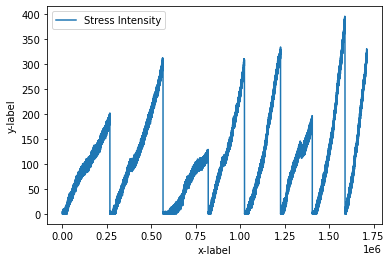

In [ ]:
#Modify Stress Intensity
#calculate offset - we ended up calculating the offset within the stress intensity function above.
#need to be careful here because it only takes the first 100 entries to calculate offset
#stress_intensity_offset = calc_stress_intensity([1600,1700,1800],[10,10,10])
#print(stress_intensity_offset)
#stress_intensity_zoff = check_nsi(stress_intensity,stress_intensity_offset)
#stress_intensity_zoff = np.asarray(stress_intensity_zoff).reshape(len(stress_intensity_zoff),1)


fig, ax = plt.subplots()
ax.plot(stress_intensity[:,0], '-', label='Stress Intensity') # store axis (ax) for latter plots
ax.set(xlabel='x-label', ylabel='y-label')
ax.legend()
plt.show()

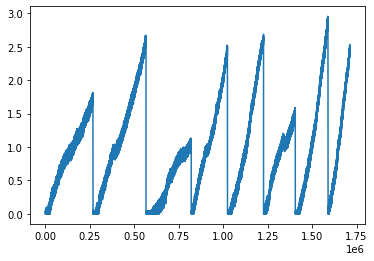

In [ ]:
scale_crackseries = 0 # 0=no 1=yes
#scale the cracklength
if scale_crackseries > 0:
  crack_series = np.asarray(crack_series).reshape(len(train_df),1)
  Scaler_SC = MinMaxScaler()
  Scaler_SC.fit(crack_series)
  joblib.dump(Scaler_SC, './Weights/Scaler_HT_TM_CS.save')
  crack_series = Scaler_SC.transform(crack_series)
  
#plot the scaled crack series
plt.plot(crack_series)

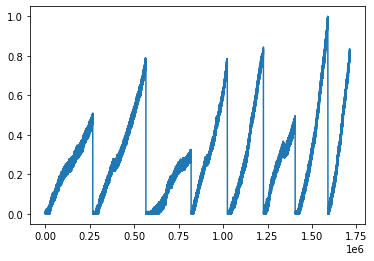

In [ ]:
#scale the stress intensity
Scaler = MinMaxScaler()
Scaler.fit(stress_intensity)
joblib.dump(Scaler, './Weights/Scaler_HT_TM.save')
stress_intensity = Scaler.transform(stress_intensity)
#plot the stress intensity
plt.plot(stress_intensity)

In [ ]:
#let's check for NaNs before proceeding - GPUs will have issues with NaNs
if (np.sum(np.isnan(crack_series[:,]))):
  print('NaN in Crack Series')
mask = np.isnan(crack_series[:,])
crack_series[mask] = 0
if (np.sum(np.isnan(temp_series[:,]))):
  print('NaN in Temperature Series')
mask = np.isnan(temp_series[:,])
temp_series[mask] = 0
if (np.sum(np.isnan(stress_intensity[:,]))):
  print('NaN in Stress Intensity')
mask = np.isnan(stress_intensity[:,])
stress_intensity[mask] = 0
print(crack_series.dtype)
print(temp_series.dtype)
print(stress_intensity.dtype)

float64
float64
float64


In [ ]:
#stack the data 
series= np.hstack((crack_series, temp_series, stress_intensity)) #horizontal stack data

In [ ]:
#k-fold data
def k_fold(series, nfolds, train_size, test_size, init_step):
  X, y = list(), list()
  skip_train = int(train_size/(nfolds+1))
  skip_test = int(test_size/nfolds)
  idx=init_step
  for s in range(nfolds):
    test_start =  idx
    test_end =    skip_test-1+idx
    train_start = skip_test+idx
    train_end =   (skip_test+skip_train)+idx
    idx = train_end+1
    print(test_start,test_end)
    seq_x, seq_y = series[test_start:test_end,:], series[train_start:train_end,:]
    X.extend(seq_x)
    y.extend(seq_y)
    print("length of X =",len(seq_x),seq_x.shape)
  return array(X), array(y)

149813 171213
length of X = 21400 (21400, 3)
342429 363829
length of X = 21400 (21400, 3)
535045 556445
length of X = 21400 (21400, 3)
727661 749061
length of X = 21400 (21400, 3)
920277 941677
length of X = 21400 (21400, 3)
1112893 1134293
length of X = 21400 (21400, 3)
1305509 1326909
length of X = 21400 (21400, 3)
1498125 1519525
length of X = 21400 (21400, 3)


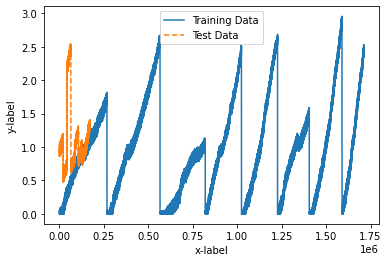

In [ ]:
#there might be an error here. Are you only validating on last case?
train_size = int(len(series) * 0.90)
test_size = len(series) - train_size

#let's try to a k-fold validation
nfolds = 8 #number of folds. let's set it equal to trials
init_step = int(len(series)/nfolds*0.7)
#call kfold function
test, train = k_fold(series,nfolds,train_size,test_size,init_step)

#let's set the whole training set to the whole thing.
train = series

#plot crack length, column data 0=crack length, 1=tempature, 2=stress intensity
fig, ax = plt.subplots()
ax.plot(train[:,0], '-', label='Training Data') # store axis (ax) for latter plots
ax.plot(test[:,0], '--', label='Test Data')
ax.set(xlabel='x-label', ylabel='y-label')
ax.legend()
plt.show()

In [ ]:
# function: split a multivariate sequence into samples
# this code will read n_steps samples and associate this with one output.
# see https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern. copy in groups?
		seq_x, seq_y = sequences[i:end_ix, 1:], sequences[end_ix, 0]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

size of xtrain = 1712146
size of ytrain = 1712146
size of xtest = 171197
size of ytest= 171197


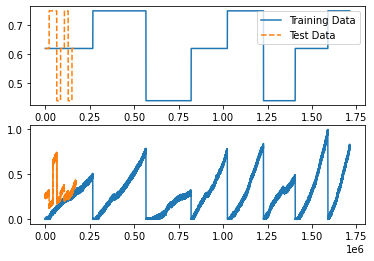

In [ ]:
# choose a number of time steps to skip when sequencing
n_steps = 3 #number of samples per output
# split into samples
#                                   seqs, nsteps
x_train, y_train = split_sequences(train, n_steps) #seperate data into samples.
x_test, y_test = split_sequences(test, n_steps)
# the samples [i1 i2 i3] [o1 o2] ...
print("size of xtrain =",len(x_train))
print("size of ytrain =",len(y_train))
print("size of xtest =",len(x_test))
print("size of ytest=",len(y_test))

fig, (ax,ax2) = plt.subplots(2,1)
ax.plot(x_train[:,0,0], '-', label='Training Data') # 
ax.plot(x_test[:,0,0], '--', label='Test Data')
ax2.plot(x_train[:,0,1], '-', label='Training Data') # 
ax2.plot(x_test[:,0,1], '--', label='Test Data')
ax.legend()
plt.show()

x_train.shape[0] 1712146
xtrain (1712146, 3, 2)
ytrain (1712146,)
xtest (171197, 3, 2)
ytest (171197,)


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


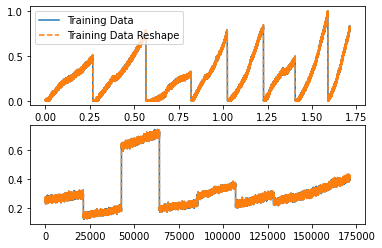

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 2 # temperature, stress intensity
#                          timesteps,                nsamples,           n_features 
x_train_rs = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features)) #reshape train array
x_test_rs = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features)) #reshape test array
#doesn't look like the reshape is necessary. reshapes to the same dimensions

print("x_train.shape[0]",x_train.shape[0])
#print shapes out to figure wtf is going on with data.
print("xtrain",x_train.shape)
print("ytrain",y_train.shape)
print("xtest",x_test.shape)
print("ytest",y_test.shape)

#plot data to compare reshape
fig, (ax,ax2) = plt.subplots(2,1)
ax.plot(x_train[:,0,1], '-', label='Training Data') # 
ax.plot(x_train_rs[:,0,1], '--', label='Training Data Reshape')
ax2.plot(x_test[:,0,1], '-', label='Test Data') # 
ax2.plot(x_test_rs[:,0,1], '--', label='Test Data Reshape')
ax.legend()
plt.show()


y_train_df (1712146, 1)


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


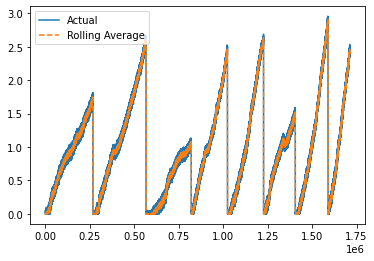

In [ ]:
#this looks like an attempt to smooth out the data
#first = y_train[0]
#y_train_df = pd.DataFrame(y_train)
#assert np.all((y_train_df.diff() == y_train_df - y_train_df.shift())[1:])
#y_train_dl = np.asarray(y_train_df.diff()).flatten()
#y_train_dl[0] = 0
#wtf???? why are you taking rolling average???
y_train_df = pd.DataFrame(y_train) # put in panda data frame
y_train_d2 = y_train_df.rolling(100).mean().dropna() #take rolling average and drop NAs
y_train_dl = np.asarray(y_train_d2).flatten() #collapse array into 1D
#x_train = x_train[99:]
print("y_train_df",y_train_df.shape)

fig, ax = plt.subplots()
ax.plot(y_train[:,], '-', label='Actual') # store axis (ax) for latter plots
ax.plot(y_train_dl, '--', label='Rolling Average')
ax.legend()
plt.show()

In [ ]:
#Select the Keras Model to Run
opt = 0 #option number
if opt == 0:
  #Option 1
  print("Selecting Option 0")
  opt = Adam(learning_rate = 0.0005)
  # define model
  model = Sequential()
  #dropout rate might be too high.
  model.add(Bidirectional(LSTM(100,activation='tanh',recurrent_activation='sigmoid',input_shape=(n_steps, n_features))))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(optimizer=opt, loss='mse')
elif opt == 2:
  #Option 1
  print("Selecting Option 1")
  opt = Adam(learning_rate = 0.0005)
  # define model
  model = Sequential()
  #dropout rate might be too high.
  model.add(Bidirectional(LSTM(1000, activation='relu',return_sequences = True, dropout=0.4), input_shape=(n_steps, n_features)))
  model.add(Dense(500))
  model.add(Bidirectional(LSTM(1000, activation='relu')))
  model.add(Dense(1))
  model.compile(optimizer=opt, loss='mse')
elif opt == 2:
  #Option 2
  print("Selecting Option 2")
  tf.executing_eagerly()
  opt = Adam(learning_rate = 0.0005)
  # define model
  model = Sequential()
  #add more layers
  model.add(Bidirectional(LSTM(20, activation='sigmoid',return_sequences = True, dropout=0.2), input_shape=(n_steps, n_features)))
  model.add(Dense(50))
  model.add(Bidirectional(LSTM(40, activation='sigmoid',return_sequences = True, dropout=0.5)))
  model.add(Dense(100))
  model.add(Bidirectional(LSTM(80, activation='sigmoid',return_sequences = True, dropout=0.5)))
  model.add(Dense(100))
  model.add(Bidirectional(LSTM(160, activation='sigmoid',return_sequences = True, dropout=0.5)))
  model.add(Dense(100))
  model.add(Bidirectional(LSTM(320, activation='sigmoid', dropout=0.5)))
  model.add(Dense(1))
  model.compile(optimizer=opt, loss='mse')
else:
  print("No Selection")
  #do nothing


Selecting Option 0


In [ ]:
#let's ping the GPU and see what colab gave us...
print(tf.config.list_physical_devices('GPU'))
print(tf.test.gpu_device_name())
print(device_lib.list_local_devices())

#let's also check version of tf and if eager is on.
print(tf.executing_eagerly())
print(tf.__version__)
print(keras.__version__)

#load gpu device
device_name = tf.test.gpu_device_name()
tf.device(device_name)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2880155848670268726
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16901393772858185906
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]
True
2.7.0
2.7.0


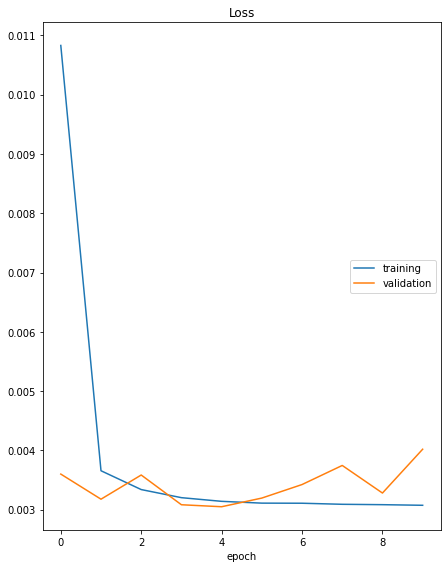

Loss
	training         	 (min:    0.003, max:    0.011, cur:    0.003)
	validation       	 (min:    0.003, max:    0.004, cur:    0.004)
6689/6689 [==============================] - 63s 9ms/step - loss: 0.0031 - val_loss: 0.0040
Training Done...


In [ ]:
# fit model
precision = 0 #decide on precision
num_epochs = 10 #number of epochs to run
#
if precision == 16: #half precision
  history = model.fit(x_train.astype('float16'), 
                    y_train.astype('float16'), 
                    epochs=num_epochs, 
                    verbose=1, 
                    batch_size = 256,
                    validation_data=(x_test, y_test.astype('float16')),
                    callbacks=[PlotLossesKeras(),EarlyStopping(monitor='val_loss', patience=10)]
                    )
  #predict validation data using trained model
  yhat = model.predict(x_test.astype('float16'), verbose=1)
elif precision == 32: #Single Precisoin
  history = model.fit(x_train.astype('float32'), 
                    y_train.astype('float32'), 
                    epochs=num_epochs, 
                    verbose=1, 
                    batch_size = 256,
                    validation_data=(x_test, y_test.astype('float32')),
                    callbacks=[PlotLossesKeras(),EarlyStopping(monitor='val_loss', patience=10)]
                    )
  #predict validation data using trained model
  yhat = model.predict(x_test.astype('float32'), verbose=1)
elif precision == 64: #Double Precision
  history = model.fit(x_train.astype('float64'), 
                    y_train.astype('float64'), 
                    epochs=num_epochs, 
                    verbose=1, 
                    batch_size = 256,
                    validation_data=(x_test, y_test.astype('float64')),
                    callbacks=[PlotLossesKeras(),EarlyStopping(monitor='val_loss', patience=10)]
                    )
  #predict validation data using trained model
  yhat = model.predict(x_test.astype('float64'), verbose=1)
else: #Mixed Precision - Let Tensorflow Decide
  history = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    verbose=1, 
                    batch_size = 256,
                    validation_data=(x_test, y_test),
                    callbacks=[PlotLossesKeras(),EarlyStopping(monitor='val_loss', patience=10)]
                    )
  print('Training Done...')

In [ ]:
#Let's take a look at the model summary so we can discuss for paper
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              82400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 82,601
Trainable params: 82,601
Non-trainable params: 0
_________________________________________________________________
None


53505/53505 [==============================] - 182s 3ms/step


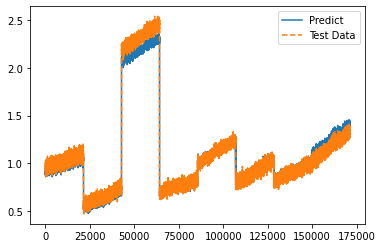

0.04667741354711031
0.038998318332130584


In [ ]:
#predict validation data using trained model
yhat = model.predict(x_test, verbose=1)
fig, ax = plt.subplots()

#Predict Traning data to compare with validation
yhat_train = model.predict(x_train, verbose=1)

ax.plot(yhat, '-', label='Predict') # store axis (ax) for latter plots
ax.plot(y_test, '--', label='Test Data')
ax.legend()
plt.show()

mae =  mean_absolute_error(y_test,yhat)
mae_train = mean_absolute_error(y_train, yhat_train)
print(mae)
print(mae_train)

In [ ]:
#tf.keras.models.save_model(model,"./Weights/Model_HT_5_21_21_TM")
#model.save("./Weights/Model_HT_5_21_21_TM")